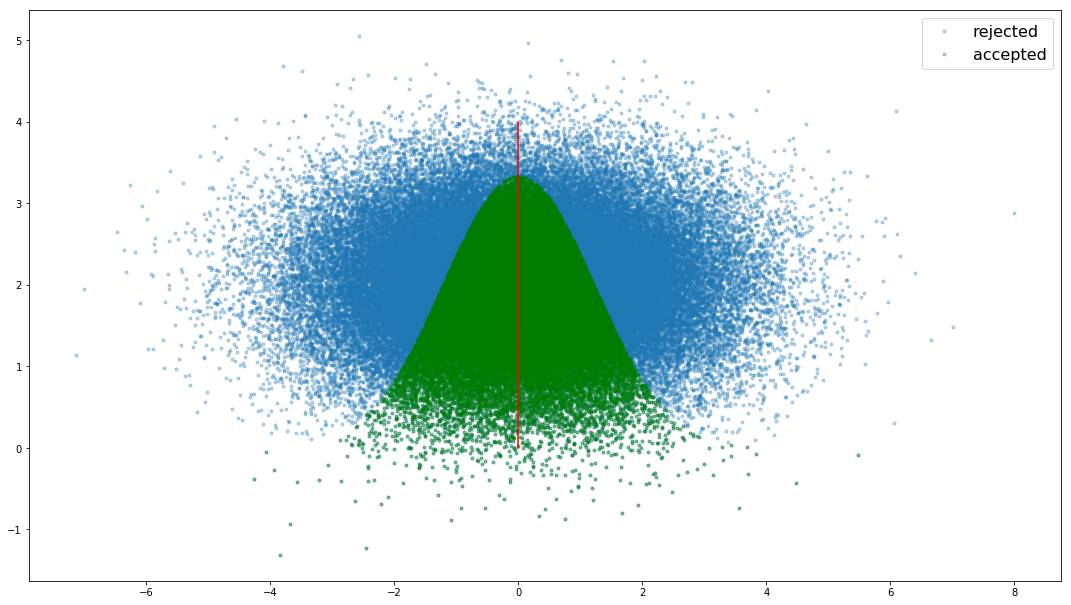

In [1]:
import numpy as np
import matplotlib.pylab as plt
import math
import random

#Task 1
def rejection(p, m, sig ,tau, numb):
    x = np.linspace(0,1,10)
    M=.3 # scale factor
    u1 = np.random.normal(p, sig, numb)
    u2 = np.random.normal(m, tau, numb)

    f = lambda x: np.exp(-np.power(x, 2.)/(2*np.power(1.2, 2.)))
    fx = f(x)
    idx = np.where(u2<=f(u1)/M)[0] # rejection criterion
    v = u1[idx]
    return u1, u2, idx

u1, u2, idx = rejection(0, 2, 1.6 , 0.7, 100000)
x = np.linspace(0,0,100)
y = np.linspace(0,4,100)

fig,ax=plt.subplots()
ax.plot(u1,u2,'.',label='rejected',alpha=.3)
ax.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3)
ax.plot(x, y, color='red')
ax.legend(fontsize=16)
fig.set_size_inches(18.5, 10.5)
plt.show()


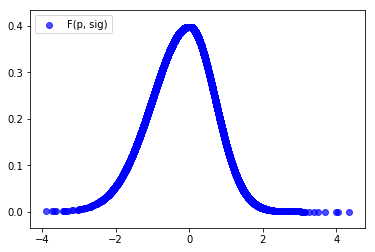

In [2]:
#Task 2
def SN(xlist, m,s,t):
    c=math.sqrt(2./math.pi)*(1./s)*(1./(1+t))
    if x<=m:
        return (c*math.exp(-1./(2* s**2) * (x-m)**2))
    else:
        return (c*math.exp(-1./(t**2 * s**2) * (x-m)**2))
    
res = []
X = []
for i in range (10000):
    #I.append(i)
    x = np.random.normal(0, 1)
    X.append(x)
    y = SN(x, 0, 1, 1)
    res.append(y)

plt.scatter(X, res, color='blue', alpha=0.7, label = "F(p, sig)")
plt.legend(loc='upper left')
plt.show()

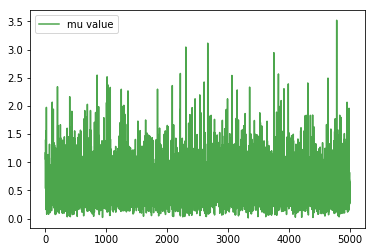

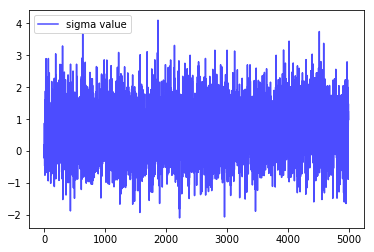

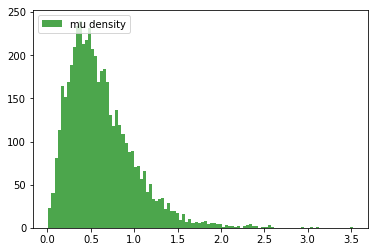

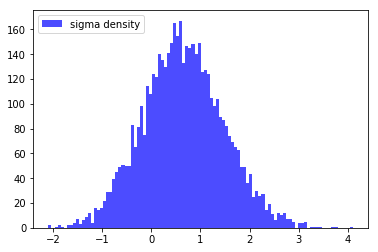

In [3]:
#Task 7

def gibbs(N=5000,thin=100):
    x=0
    y=0
    x_res = []
    y_res = []
    for i in range(N):
        for j in range(thin):         
            x=random.gammavariate(3,1.0/(y*y+4))
            y=random.gauss(1.0/(x+1),1.0/math.sqrt(x+1))
            
            #x = np.random.normal(m1+rho*(y[i-1]-m2)/s2,s1*sd)
            #y = np.random.normal(m2+rho*(x[i-1]-m1)/s1,s2*sd)
        
        x_res.append(x)
        y_res.append(y)
    return x_res, y_res

x_res, y_res = gibbs() 
plt.plot(x_res, color='green', alpha=0.7, label = "mu value")
plt.legend(loc='upper left')
plt.show()

plt.plot(y_res, color='blue', alpha=0.7, label = "sigma value")
plt.legend(loc='upper left')
plt.show()

plt.hist(x_res, 100, color='green', alpha=0.7, label = "mu density")
plt.legend(loc='upper left')
plt.show()

plt.hist(y_res, 100, color='blue', alpha=0.7, label = "sigma density")
plt.legend(loc='upper left')
plt.show()

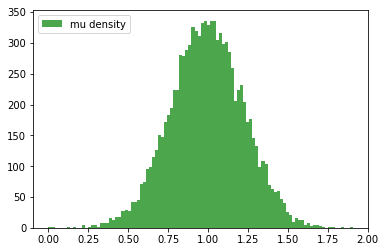

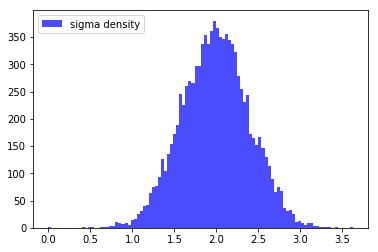

In [4]:
#Task 7

def gibbs(n=10000):
    x=0
    y=0
    x_res = []
    y_res = []
    
    rho=.99 #correlation
    #Means
    m1 = 1
    m2 = 2
    #Standard deviations
    s1 = 1.2
    s2 = 2.5
    #Initialize vectors
    x=np.zeros(n)
    y=np.zeros(n)
    sd=math.sqrt(1-rho**2)
    # the core of the method: sample recursively from two normal distributions
    # Tthe mean for the current sample, is updated at each step.
    for i in range(1,n):
        x[i] = np.random.normal(m1+rho*(y[i-1]-m2)/s2,s1*sd)
        y[i] = np.random.normal(m2+rho*(x[i-1]-m1)/s1,s2*sd)
        
    x_res.append(x)
    y_res.append(y)
    return x_res, y_res

x_res, y_res = gibbs() 


plt.hist(x_res, 100, color='green', alpha=0.7, label = "mu density")
plt.legend(loc='upper left')
plt.show()

plt.hist(y_res, 100, color='blue', alpha=0.7, label = "sigma density")
plt.legend(loc='upper left')
plt.show()

In [5]:
#Task 8
def gibbs(N=5000,thin=100):
    x=0
    y=0
    x_res = []
    y_res = []
    for i in range(N):
        for j in range(thin):         
            x=random.gammavariate(3,1.0/(y*y+4))
            y=random.gauss(1.0/(x+1),1.0/math.sqrt(x+1))
        
        x_res.append(x)
        y_res.append(y)
    return x_res, y_res

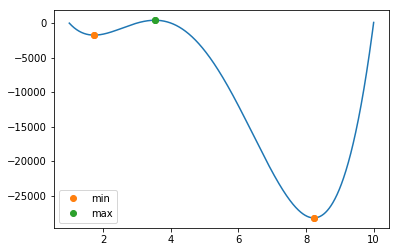

In [6]:
#Task 9
x1 = np.linspace(1,10,1000)
x2 = np.linspace(1,100,1000)

data = 100 * (x2 - x1 * x1)**2 + (1 - x1)**2 - 400 * x1 * (x2 - x1 * x1) - 2 * (1 - x1) - 200 * (x2 - x1 * x1)

l_min = (np.gradient(np.sign(np.gradient(data))) > 0).nonzero()[0]
l_max = (np.gradient(np.sign(np.gradient(data))) < 0).nonzero()[0]

plt.plot(x1,data)
plt.plot(x1[l_min], data[l_min], "o", label="min")
plt.plot(x1[l_max], data[l_max], "o", label="max")
plt.legend()
plt.show()